In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

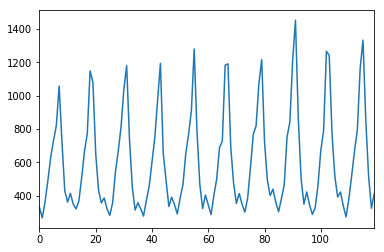

In [2]:
df_ice = pd.read_csv('C:/home/myproj/study_ml/ap_timeseries/chap1/icecream.csv')
df_ice.icecream.plot()


## 1. T系列の作成
中心化移動平均を求める。

In [3]:
df_ma = df_ice.icecream.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()

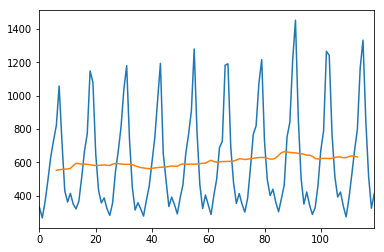

In [4]:
df_ice.icecream.plot()
df_cma.plot()

##  2. S×I系列の作成
原系列を中心化平均で割った値を求め、100倍する。

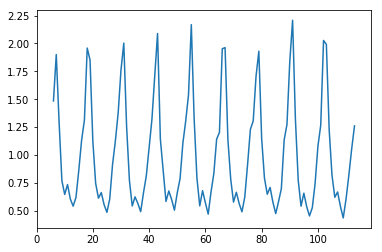

In [5]:
df_orig_div_cma = df_ice.icecream / df_cma
df_orig_div_cma.plot()

# 3.S系列の作成
月ごとの平均値を求め、その和が1200になるように調整する。


In [19]:
orig_div_cma = df_orig_div_cma.values



s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
for idx in range(len(orig_div_cma)//12):
    cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
    mask = cut_orig_div_cma != cut_orig_div_cma
    counter += np.where(mask, 0, 1)
    s_index += np.where(mask, 0, cut_orig_div_cma)

s_index /= counter
s_index = s_index / s_index.sum() * 1200

print(s_index)

[ 57.05374632  48.4935788   61.87100094  82.34066594 112.21945388
 129.50185932 178.03993789 201.78512364 122.39560152  79.21403276
  59.2923283   67.79267067]


# T×I系列の作成
原系列を季節指数で割って100をかけ、季節調整済みの値とする。

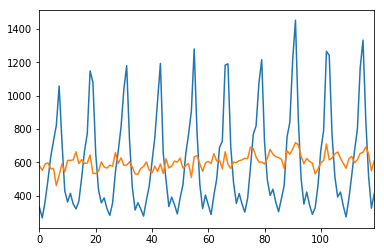

In [25]:
tiled_s_index = np.tile(s_index, len(orig_div_cma)//12)
df_adjusted_series = df_ice.icecream / tiled_s_index * 100
df_ice.icecream.plot()
df_adjusted_series.plot()